In [1]:
import gensim
import nltk
import numpy as np
import pandas as pd
import string
import pickle
import json

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import cm
%matplotlib inline

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

In [6]:
from collections import Counter

In [7]:
from itertools import chain

In [8]:
def flatten(listOfLists):
    "Flatten one level of nesting"
    return chain.from_iterable(listOfLists)

In [9]:
from pprint import pprint

In [9]:
df = pd.read_csv("./mails/Emails.csv")

In [10]:
print(df.columns)
df.head()

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# Prepare texts

In [10]:
texts = df['ExtractedBodyText'].dropna().drop_duplicates()

In [11]:
len(texts)

5916

In [12]:
# tokenizer = nltk.RegexpTokenizer("\w+")

In [13]:
texts = [
    "".join(l for l in line.lower() if l not in string.punctuation).split()
    for line in texts]

In [14]:
stemmer = nltk.stem.porter.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
texts = [
    [stemmer.stem(word) 
     for word in line if word not in stopwords and len(word) > 3 and len(word) < 20] 
    for line in texts
]

In [16]:
with open("./mails/texts.json", "w") as fout:
    json.dump(texts, fout, indent=4, ensure_ascii=False)

### quick version

In [10]:
with open("./mails/texts.json") as fin:
    texts = json.load(fin)

In [11]:
texts = [x for x in texts if len(x) > 2]

# W2V or Tf-idf... what will you choose?

## W2V Path

### Load w2v
This will take around 1-2 minutes and 5 GB of your RAM.

In [12]:
w2v_path = "./w2v/GoogleNews-vectors-negative300.bin"

In [13]:
try:
    w2v = gensim.models.KeyedVectors.load_word2vec_format(w2v_path, binary=True)
except UnicodeDecodeError:
    w2v = gensim.models.KeyedVectors.load_word2vec_format(w2v_path, binary=False)

or, as I dont like to use so much RAM:

In [15]:
w2v_mini = {}
for line in texts:
    for word in line:
        if word in w2v:
            w2v_mini[word] = w2v[word]

In [16]:
with open("mails/w2v_mini.pkl", "wb") as fout:
    pickle.dump(w2v_mini, fout)

###  quick version

In [11]:
with open("mails/w2v_mini.pkl", "rb") as fin:
    w2v_mini = pickle.load(fin)

In [12]:
len(w2v_mini)

8249

In [13]:
vector_size = 300

### encoding

In [14]:
def encodde_line(line):
    vectors = []
    for word in line:
        if word in w2v_mini:
            embedding = w2v_mini[word]
            vectors.append(embedding)
    if len(vectors) > 0:
        result = np.mean(np.array(vectors), axis=0)
        return result
    else:
        return None

In [15]:
encoded_texts = list(map(encodde_line, texts))

In [16]:
texts = [line for line, emb in zip(texts, encoded_texts) if emb is not None]

In [17]:
encoded_texts = [x for x in encoded_texts if x is not None]

In [18]:
encoded_texts = np.vstack(encoded_texts)

In [19]:
encoded_texts.shape

(4750, 300)

## Tf-idf Path

In [12]:
vectorizer = TfidfVectorizer(max_df=500, min_df=10)

In [13]:
encoded_texts = vectorizer.fit_transform(
    [" ".join(line) for line in texts])

In [14]:
encoded_texts.shape

(4771, 3095)

# K-Means for God of K-Means

In [15]:
try:
    encoded_texts_norm = sklearn.preprocessing.scale(encoded_texts, axis=1)
except:
    encoded_texts_norm = encoded_texts

In [116]:
# scores = [
#     cross_val_score(
#         KMeans(n_clusters=n), 
#         encoded_texts_norm, 
#         cv=4, n_jobs=4).mean() 
#     for n in range(4, 128, 4)]

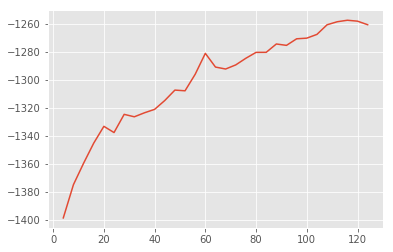

In [117]:
# plt.plot(list(range(4, 128, 4)), scores)

In [16]:
n_clusters = 6

In [17]:
if encoded_texts_norm.shape[1] > 300:
    svd = TruncatedSVD(n_components=300, random_state=42)
    encoded_texts_norm = svd.fit_transform(encoded_texts_norm)

clf = KMeans(n_clusters=n_clusters).fit(encoded_texts_norm)
y_pred = clf.predict(encoded_texts_norm)

In [93]:
# clf = AgglomerativeClustering(
#     n_clusters=n_clusters, 
#     affinity="cosine", 
#     linkage="complete").fit(encoded_texts)
# y_pred = clf.labels_

# But we need moar "understanding"!
# So, visualization part

In [18]:
def tsne(
        X, y=None,
        perplexity=30.0, learning_rate=1.0, n_iter=1000, metric='cosine',
        seed=42, verbose=False):
    converter = TSNE(
        n_components=2,
        perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, metric=metric,
        random_state=seed, verbose=verbose)
    X_new = converter.fit_transform(X, y=y)
    return X_new


def pca(X, y=None, seed=42):
    try:
        converter = PCA(n_components=2, random_state=seed)
        pipe = Pipeline([('scaling', Normalizer()), ('pca', converter)])
        X_new = pipe.fit_transform(X, y)
    except TypeError as ex:
        converter = TruncatedSVD(n_components=2, random_state=seed)
        X_new = converter.fit_transform(X, y)
    return X_new

# TSNE (No.)

In [25]:
# encoded_texts_tsne = tsne(encoded_texts_norm, y_pred)

In [ ]:
# fig, ax = plt.subplots(ncols=1, figsize=(16, 16))
# color = cm.rainbow(np.linspace(0, 1, n_clusters))
# for l, c in zip(range(n_clusters), color):
#     ax.scatter(
#         encoded_texts_tsne[y_pred == l][:, 0], 
#         encoded_texts_tsne[y_pred == l][:, 1], 
#         c=c, label=l, s=16, linewidth=0)
# ax.set_xlim((-0.0005, 0.0005))
# ax.set_ylim((-0.0005, 0.0005))

# PCA (w2v version)

In [27]:
texts = np.array(texts)

In [28]:
encoded_texts_pca = pca(encoded_texts_norm, y_pred)

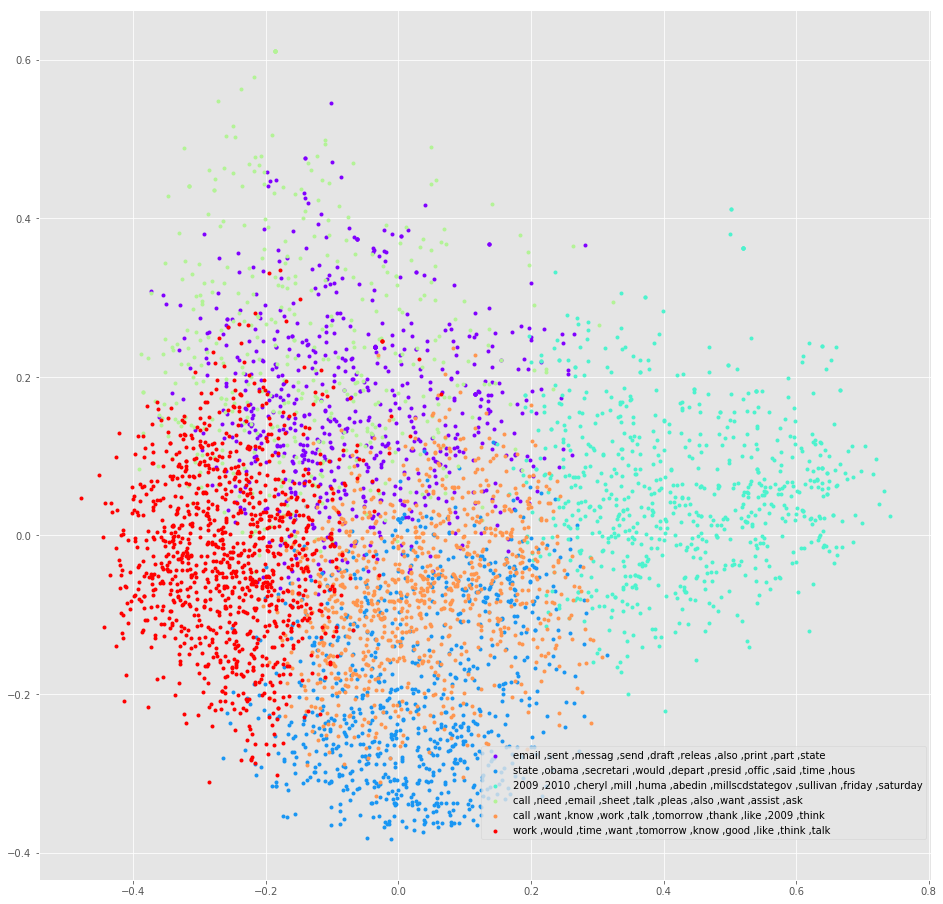

In [29]:
fig, ax = plt.subplots(ncols=1, figsize=(16, 16))
color = cm.rainbow(np.linspace(0, 1, n_clusters))
for l, c in zip(range(n_clusters), color):
    ax.scatter(
        encoded_texts_pca[y_pred == l][:, 0], 
        encoded_texts_pca[y_pred == l][:, 1], 
        c=c, label=l, s=16, linewidth=0)
lgn = plt.legend(
        [" ,".join([x[0] 
                    for x in Counter(flatten(texts[y_pred == i])).most_common(10)]) 
         for i in range(n_clusters)],
        loc='center right',
        bbox_to_anchor=(1.0, 0.1))

# PCA (tf-ifd version)

In [19]:
texts = np.array(texts)

In [20]:
encoded_texts_pca = pca(encoded_texts_norm, y_pred)

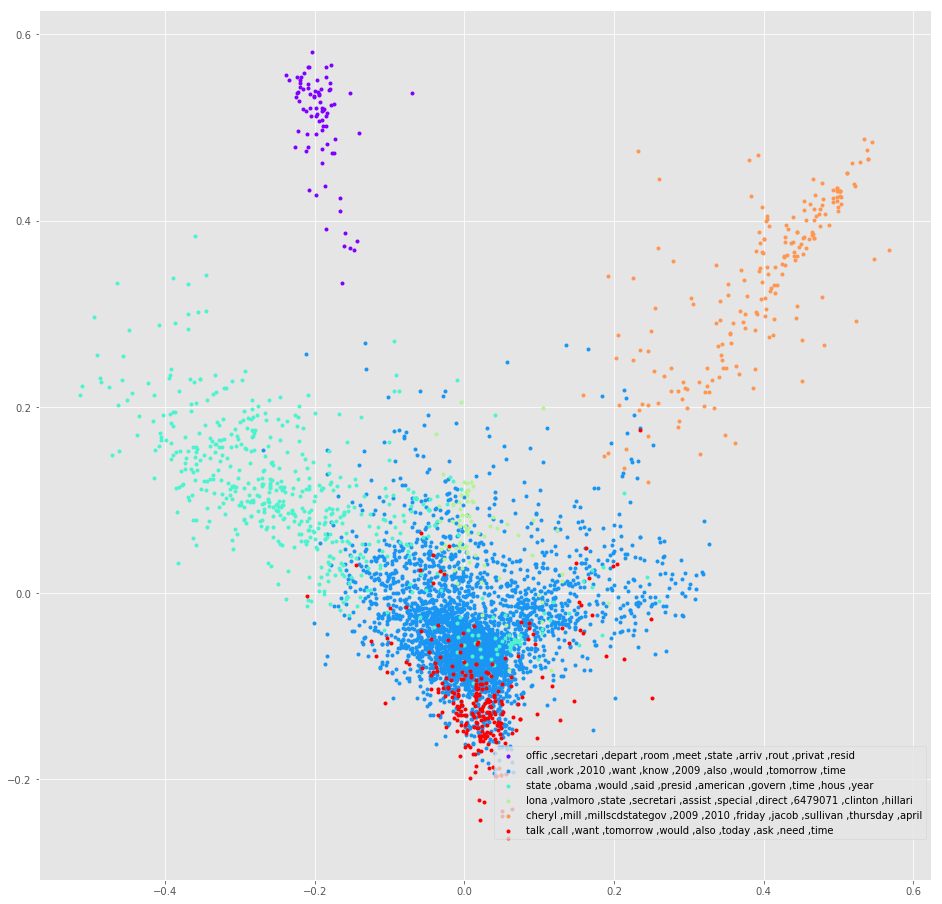

In [21]:
fig, ax = plt.subplots(ncols=1, figsize=(16, 16))
color = cm.rainbow(np.linspace(0, 1, n_clusters))
for l, c in zip(range(n_clusters), color):
    ax.scatter(
        encoded_texts_pca[y_pred == l][:, 0], 
        encoded_texts_pca[y_pred == l][:, 1], 
        c=c, label=l, s=16, linewidth=0)
lgn = plt.legend(
        [" ,".join([x[0] 
                    for x in Counter(flatten(texts[y_pred == i])).most_common(10)]) 
         for i in range(n_clusters)],
        loc='center right',
        bbox_to_anchor=(1.0, 0.1))

## Additional part

# Bigrams

In [32]:
bi_counts = CountVectorizer(ngram_range=(2, 2)).fit(
    [" ".join(line) for line in texts])

In [33]:
pprint(sorted(
    bi_counts.vocabulary_.items(), 
    key=lambda x: x[1], reverse=True)[:10])

[('zurich lisl', 213519),
 ('zurich financi', 213518),
 ('zumbi pradar', 213517),
 ('zuma south', 213516),
 ('zuma refer', 213515),
 ('zuma make', 213514),
 ('zuma jibril', 213513),
 ('zulciernain tahir', 213512),
 ('zuckerman town', 213511),
 ('zuckerman publish', 213510)]


# Collocations

In [34]:
bi_collocations = nltk.collocations.BigramAssocMeasures()

In [35]:
finder = nltk.collocations.BigramCollocationFinder.from_words(
    flatten(texts))

In [36]:
pprint(finder.nbest(bi_collocations.pmi, 10))

[('0081', '907203'),
 ('011anta', 'humala'),
 ('0128', 'liim7'),
 ('01l413', 'ydalo'),
 ('040209', '060900'),
 ('0545', '0615hr'),
 ('06let', 'sttie471'),
 ('0777715903', '0799715903'),
 ('0799715903', 'ilicstategov'),
 ('091412docx', 'september14')]
